# Building a CNN 

#### (Q) Use the CIFAR-10 dataset for the questions. Perform the image classification using the dataset based on the network configuration defined in the individual part.

__Importing Dependencies:__

In [1]:
import keras
from keras import datasets, layers, models
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; 

### Use the CIFAR-10 dataset for the questions. Perform the image classification using the dataset based on the network configuration defined in the individual part.

__Reading the dataset into x and y train and test variables:__

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(train_images, train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

__Performing Exploratory Data Analysis:__

In [5]:
print(f"Shape of Training Images: {train_images.shape}")
print(f"Shape of Training Labels: {train_labels.shape}")
print(f"Shape of Testing Images: {test_images.shape}")
print(f"Shape of Testing Labels: {test_labels.shape}")

Shape of Training Images: (50000, 32, 32, 3)
Shape of Training Labels: (50000, 1)
Shape of Testing Images: (10000, 32, 32, 3)
Shape of Testing Labels: (10000, 1)


__Creating Labels for our images in the dataset:__

In [6]:
labels = ['airplane',
                   'automobile',
                   'bird',
                   'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

__Visualizing a few of the images:__

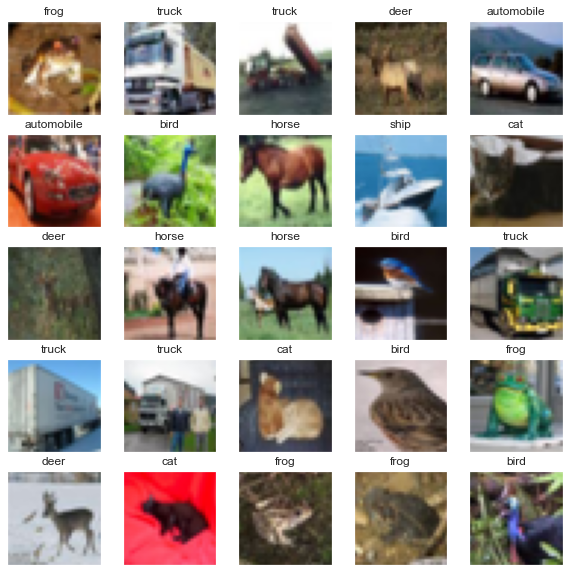

In [7]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(10, 10))
index = 0
for i in range(5):
    for j in range(5):
        axes[i,j].set_title(labels[train_labels[index][0]]) 
        axes[i,j].imshow(train_images[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

__Preprocessing the data:__

In [8]:
#converting the pixels data to float data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#standardizing the data, 255 being the brightest pixel
train_images = train_images/255
test_images = test_images/255     

#one hot encoding the data for classification tasks
num_classes = 10
train_labels = np_utils.to_categorical(train_labels,num_classes)
test_labels = np_utils.to_categorical(test_labels,num_classes)

__Q1 Built 7 convolutional layers CNN with 16 filters in the first two layers, 32 filters in the next pair of conv layers, 64 in the next pair, and 128 in the final conv layer. After that any number of dense layers you can apply. After each pair of convolutional layers and the final conv layer, you need to apply pooling with filter size (2*2). Filter size in the convolutional layers can be fixed to (3*3).__

###### 1a. The network should not use any padding

__Making our CNN Architechture:__

In [53]:
#initializing our model for question1a
model = Sequential()

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='valid'))
model.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='valid'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [54]:
#compiling our model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [56]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                

In [57]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels),verbose=2,callbacks=[es])

Epoch 1/5
782/782 - 49s - loss: 1.5693 - accuracy: 0.4260 - val_loss: 1.2917 - val_accuracy: 0.5364 - 49s/epoch - 63ms/step
Epoch 2/5
782/782 - 47s - loss: 1.2000 - accuracy: 0.5744 - val_loss: 1.1334 - val_accuracy: 0.5976 - 47s/epoch - 60ms/step
Epoch 3/5
782/782 - 46s - loss: 1.0276 - accuracy: 0.6372 - val_loss: 0.9607 - val_accuracy: 0.6563 - 46s/epoch - 59ms/step
Epoch 4/5
782/782 - 45s - loss: 0.9031 - accuracy: 0.6820 - val_loss: 0.8800 - val_accuracy: 0.6920 - 45s/epoch - 58ms/step
Epoch 5/5
782/782 - 45s - loss: 0.8062 - accuracy: 0.7177 - val_loss: 0.8437 - val_accuracy: 0.7064 - 45s/epoch - 58ms/step


In [58]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


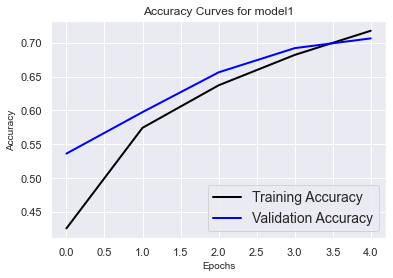

In [59]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves for model1', fontsize=12)
plt.show()

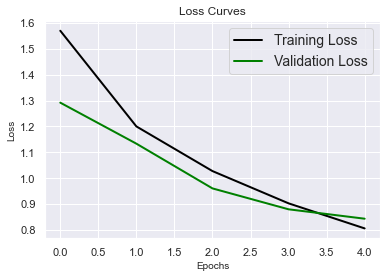

In [60]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()

__Making predictions on our first model:__

In [61]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[4.83463705e-02 1.19341733e-02 4.26923856e-02 ... 1.22822253e-02
  1.17158204e-01 9.88656655e-03]
 [1.90427154e-02 2.21801493e-02 3.64018788e-08 ... 5.09131848e-10
  9.57862258e-01 9.14126169e-04]
 [2.52959400e-01 7.68974647e-02 4.09677671e-03 ... 8.79318686e-04
  6.13068044e-01 4.94837463e-02]
 ...
 [1.66879807e-04 4.44029902e-05 2.90709082e-02 ... 5.20945936e-02
  7.98728797e-05 8.96243364e-05]
 [2.61187643e-01 7.13060200e-01 1.25307241e-03 ... 1.19960995e-03
  1.37556810e-03 6.21121516e-03]
 [2.73396637e-07 1.60266694e-07 3.35635877e-06 ... 9.96911585e-01
  8.57440057e-08 1.30271928e-07]]
[3 8 8 ... 5 1 7]


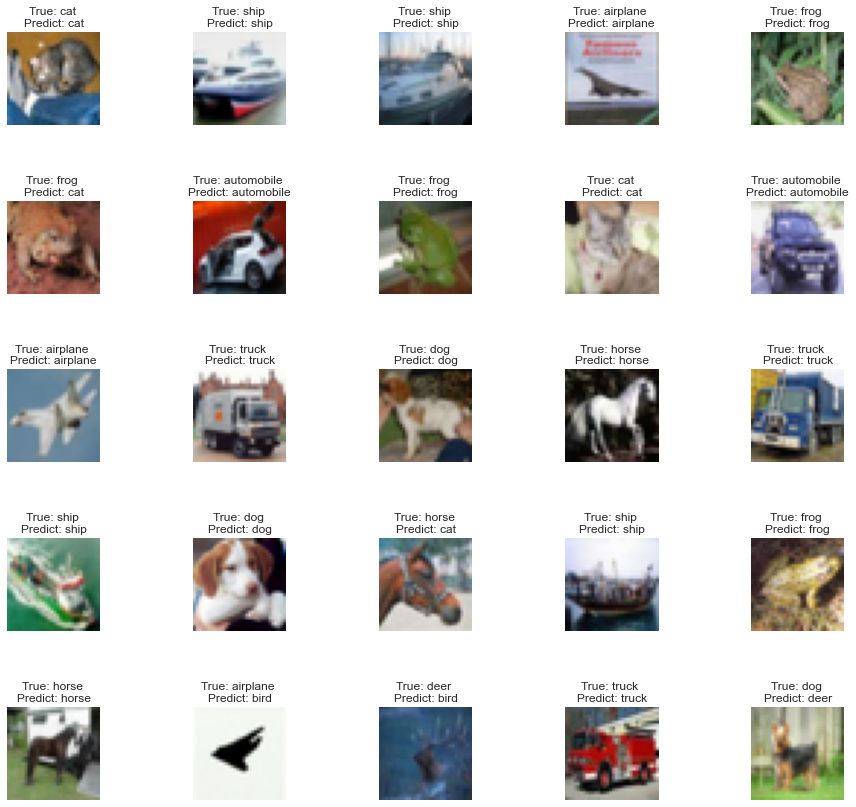

In [62]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(test_labels[i])], labels[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

###### 1b. With padding

In [19]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model2.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(10, activation='softmax'))

In [20]:
#compiling our model
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [22]:
history2 = model2.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels),verbose=2,callbacks=[es])

Epoch 1/5
782/782 - 66s - loss: 1.6429 - accuracy: 0.3844 - val_loss: 1.3213 - val_accuracy: 0.5109 - 66s/epoch - 85ms/step
Epoch 2/5
782/782 - 69s - loss: 1.1891 - accuracy: 0.5672 - val_loss: 1.1545 - val_accuracy: 0.5904 - 69s/epoch - 89ms/step
Epoch 3/5
782/782 - 71s - loss: 0.9633 - accuracy: 0.6580 - val_loss: 0.9695 - val_accuracy: 0.6519 - 71s/epoch - 91ms/step
Epoch 4/5
782/782 - 66s - loss: 0.8388 - accuracy: 0.7046 - val_loss: 0.8609 - val_accuracy: 0.7037 - 66s/epoch - 85ms/step
Epoch 5/5
782/782 - 66s - loss: 0.7355 - accuracy: 0.7409 - val_loss: 0.8148 - val_accuracy: 0.7157 - 66s/epoch - 84ms/step


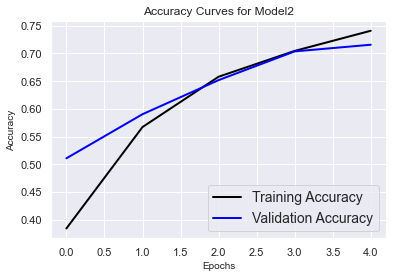

In [23]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history2.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history2.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves for Model2', fontsize=12)
plt.show()

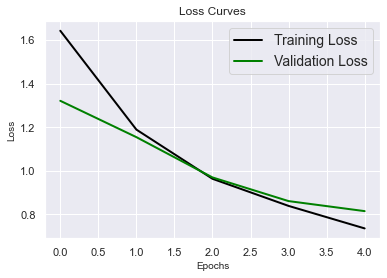

In [24]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history2.history['loss'], 'black', linewidth=2.0)
plt.plot(history2.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()

__Making predictions on our secondmodel:__

In [25]:
predict2 = model2.predict(test_images)
print(predict2)

pred_classes2 = np.argmax(predict2, axis=1)
print(pred_classes2)

[[6.62879102e-05 8.79947765e-05 1.54427695e-03 ... 1.78424190e-04
  8.75016395e-03 1.45037222e-04]
 [9.59081081e-05 7.64786091e-04 1.48338382e-08 ... 2.36415748e-10
  9.99118149e-01 2.10680537e-05]
 [6.44039288e-02 3.91347939e-03 1.02425115e-02 ... 2.77818390e-03
  9.00671721e-01 1.08780814e-02]
 ...
 [9.99459065e-04 1.46468272e-04 2.16659397e-01 ... 6.82433397e-02
  7.31934269e-04 1.67830731e-03]
 [1.82231367e-01 2.91205384e-02 2.89279670e-01 ... 6.80590495e-02
  1.83044723e-03 6.49407785e-03]
 [5.86134785e-09 7.55905685e-11 1.37240946e-07 ... 9.99867678e-01
  1.38768469e-10 5.39745915e-10]]
[3 8 8 ... 5 4 7]


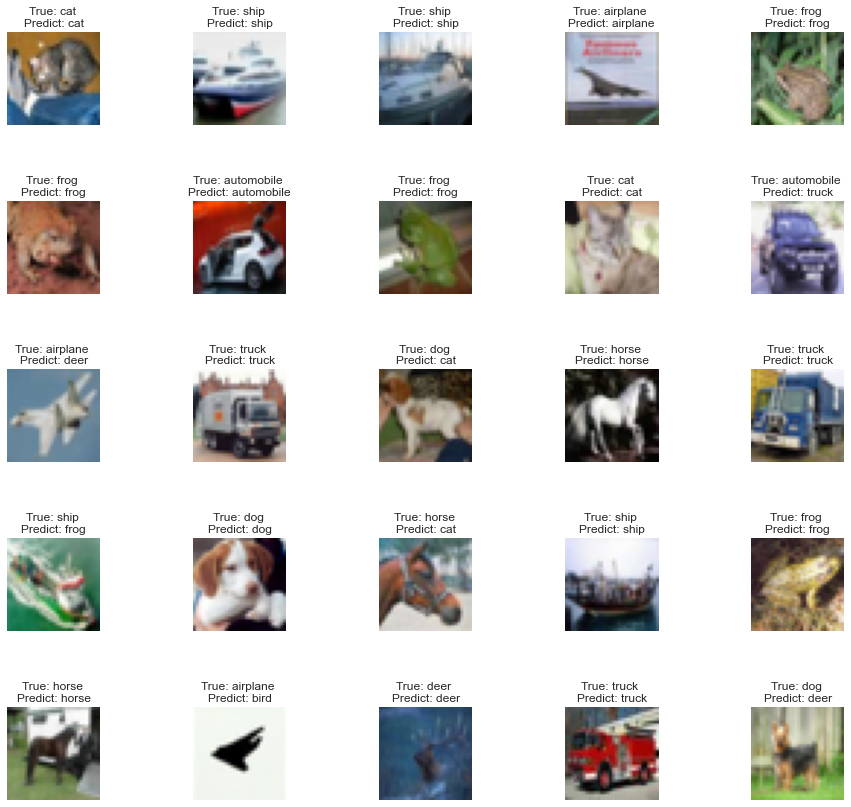

In [26]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(test_labels[i])], labels[pred_classes2[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

__Q2 Built the network defined in Q. 1 without a pooling layer.__

In [27]:
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model3.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
#model3.add(MaxPool2D(pool_size=2))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=2))

model3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=2))

model3.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=2))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(rate=0.25))
model3.add(Dense(10, activation='softmax'))

In [28]:
#compiling our model
model3.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [29]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [30]:
history3 = model3.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels),verbose=2,callbacks=[es])

Epoch 1/5
782/782 - 170s - loss: 1.6456 - accuracy: 0.3950 - val_loss: 1.2687 - val_accuracy: 0.5420 - 170s/epoch - 218ms/step
Epoch 2/5
782/782 - 166s - loss: 1.1342 - accuracy: 0.5939 - val_loss: 0.9904 - val_accuracy: 0.6498 - 166s/epoch - 213ms/step
Epoch 3/5
782/782 - 178s - loss: 0.8798 - accuracy: 0.6903 - val_loss: 0.8308 - val_accuracy: 0.7077 - 178s/epoch - 228ms/step
Epoch 4/5
782/782 - 172s - loss: 0.7211 - accuracy: 0.7465 - val_loss: 0.7676 - val_accuracy: 0.7360 - 172s/epoch - 219ms/step
Epoch 5/5
782/782 - 171s - loss: 0.6032 - accuracy: 0.7881 - val_loss: 0.7071 - val_accuracy: 0.7622 - 171s/epoch - 218ms/step


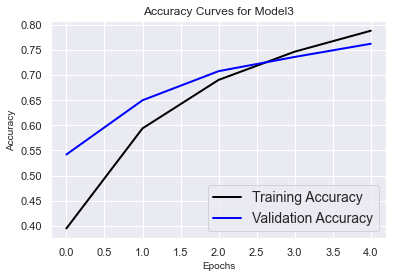

In [31]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history3.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history3.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves for Model3', fontsize=12)
plt.show()

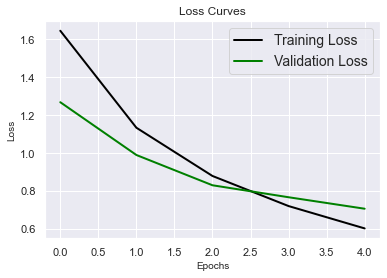

In [32]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history3.history['loss'], 'black', linewidth=2.0)
plt.plot(history3.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()

__Making predictions on our third model:__

In [33]:
predict3 = model3.predict(test_images)
print(predict3)

pred_classes3 = np.argmax(predict3, axis=1)
print(pred_classes3)

[[1.7599023e-03 4.8144584e-04 9.3245215e-04 ... 4.6329480e-04
  1.7773937e-02 6.0427422e-04]
 [1.8870267e-04 2.3458485e-02 5.4564322e-09 ... 3.3026121e-10
  9.7629243e-01 6.0243499e-05]
 [2.2694874e-01 7.9789802e-02 1.8658721e-03 ... 5.1551504e-04
  6.5627390e-01 2.7052980e-02]
 ...
 [8.3284613e-05 3.6995158e-07 3.6025453e-02 ... 2.4500905e-02
  2.3671832e-06 5.5751575e-06]
 [6.0119981e-01 3.4624922e-01 1.6605120e-02 ... 5.7176291e-04
  1.2770750e-03 5.1796419e-04]
 [7.1200719e-12 7.0684933e-15 3.5911927e-09 ... 9.9997795e-01
  3.8299143e-16 4.9611245e-14]]
[3 8 8 ... 5 0 7]


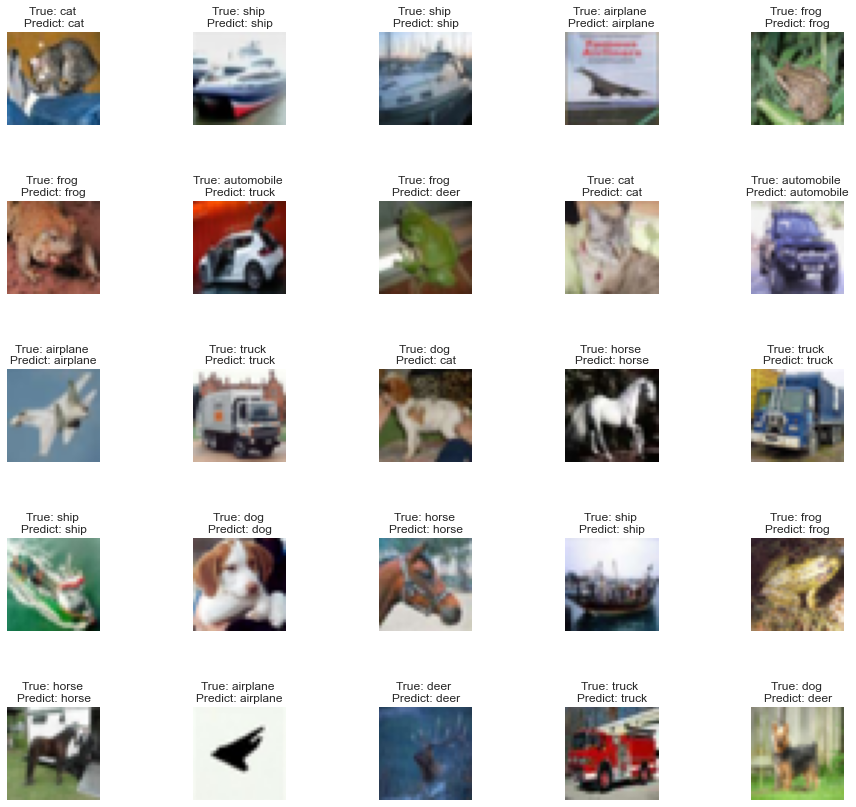

In [34]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(test_labels[i])], labels[pred_classes3[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

__Q3 Increase the number of filters in each layer by a factor of 2.__

In [35]:
model4 = Sequential()
model4.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(Conv2D(filters=32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(MaxPool2D(pool_size=2))

model4.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model4.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPool2D(pool_size=2))

model4.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model4.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPool2D(pool_size=2))

model4.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPool2D(pool_size=2))

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(rate=0.25))
model4.add(Dense(10, activation='softmax'))

In [36]:
model4.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [37]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [39]:
history4 = model4.fit(train_images, train_labels, batch_size=64, epochs=2,
                    validation_data=(test_images, test_labels),verbose=1,callbacks=[es])

Epoch 1/2
782/782 [==============================] - 655s 838ms/step - loss: 1.5432 - accuracy: 0.4263 - val_loss: 1.2688 - val_accuracy: 0.5397
Epoch 2/2
782/782 [==============================] - 651s 833ms/step - loss: 1.0947 - accuracy: 0.6125 - val_loss: 0.9849 - val_accuracy: 0.6464


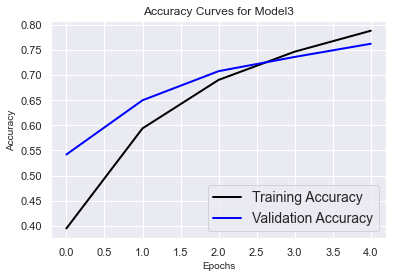

In [40]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history3.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history3.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves for Model3', fontsize=12)
plt.show()

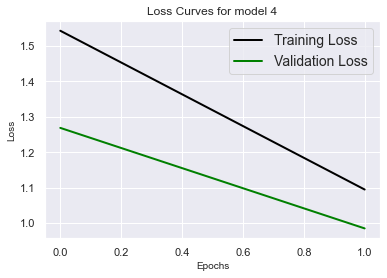

In [41]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history4.history['loss'], 'black', linewidth=2.0)
plt.plot(history4.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves for model 4', fontsize=12)
plt.show()

In [42]:
predict4 = model4.predict(test_images)
print(predict4)

pred_classes4 = np.argmax(predict4, axis=1)
print(pred_classes4)

[[2.0437764e-03 3.8996339e-03 6.4051576e-02 ... 6.5109627e-03
  1.8085150e-02 2.1514136e-03]
 [5.2848078e-02 4.7163448e-01 2.8970875e-04 ... 2.6363281e-05
  4.1815314e-01 5.6811757e-02]
 [1.6174316e-01 9.1050550e-02 1.5027648e-02 ... 2.5657935e-03
  6.1149061e-01 9.5041372e-02]
 ...
 [2.4743748e-04 4.4525768e-05 2.7780745e-02 ... 5.8993973e-02
  1.3496273e-04 2.4324193e-04]
 [1.7741272e-01 2.1432835e-01 1.6857629e-01 ... 4.0641297e-02
  2.2191560e-02 1.2393312e-02]
 [5.9297534e-05 2.2711718e-06 1.2484532e-04 ... 9.5633823e-01
  8.4635354e-07 1.3615581e-04]]
[3 1 8 ... 5 4 7]


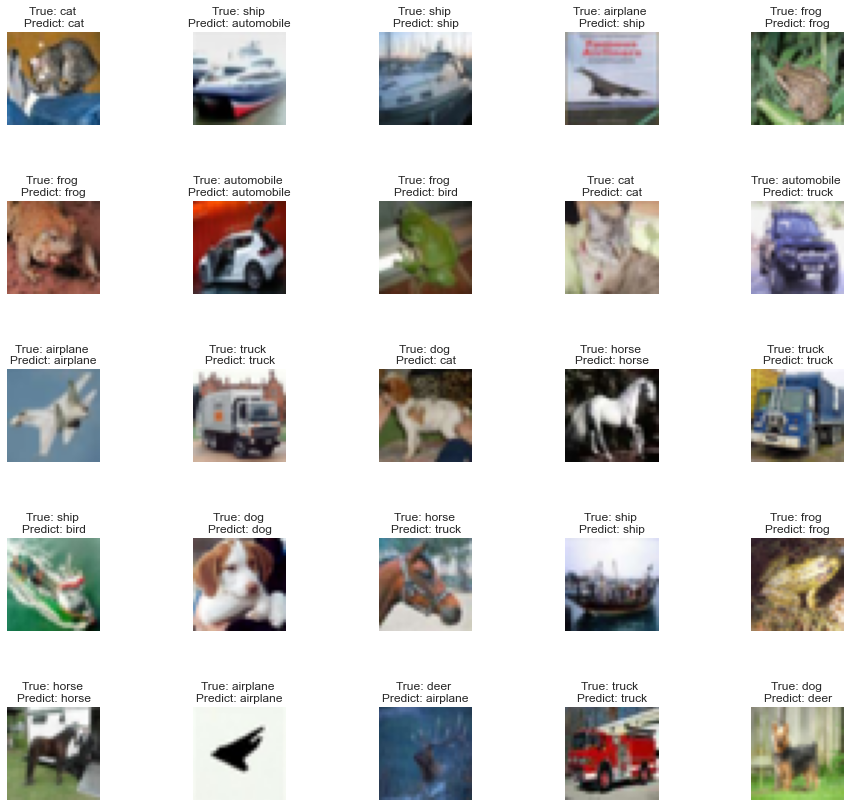

In [43]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(test_labels[i])], labels[pred_classes4[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)